# Homework 2 - Classification

In this exercise you will use scikit-learn, a popular machine learning package in python to train and tune a classifier. A particularly useful feature is that all classifiers (and linear models) are called using the same API, so it is easy to test between different models (see the sklearn-intro notebook for examples). So in this exercise we will a classification technique (logistic regression) that is representative of methods and challenges you will encounter when using any classification method.


## Dataset 1
The dataset you will be using is default of credit card clients Data Set.
There are two data files: "CreditDefault_training.csv" and "CreditDefault_Xtest.csv"
Both files have the following fields, except the label ("default.payment.next.month") which is not available in "CreditDefault_Xtest.csv"

Features:

1 - LIMIT_BAL:  Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. <br>
2 - SEX: (1 = male; 2 = female) <br>
3- EDUCATION: (six levels: 1,2,3,4,5,6) <br>
4 - MARRIAGE: (1 = married; 2 = single; 3 = others) <br>
5 - AGE <br>

From "PAY_1" to "PAY_6": History of past payment (Repayment status: -2: Balance paid in full and no transactions this period; -1: Balance paid in full, but account has a positive balance at end of period due to recent transactions for which payment has not yet come due; 0: Customer paid the minimum due amount, but not the entire balance; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.)<br>
6 - PAY_1: the repayment status in September, 2005 <br>
7 - PAY_2: the repayment status in August, 2005 <br>
...<br>
11 - PAY_6: the repayment status in April, 2005 <br>

From "BILL_AMT1" to "BILL_AMT6": Amount of bill statement (NT dollar).<br>
12 - BILL_AMT1 : amount of bill statement in September, 2005<br>
13 - BILL_AMT2 : amount of bill statement in August, 2005<br>
...<br>
17 - BILL_AMT6 : amount of bill statement in April, 2005<br>

From "PAY_AMT1" to "PAY_AMT6": Amount of previous payment (NT dollar).<br>
18 - PAY_AMT1 : amount paid in September, 2005<br>
19 - PAY_AMT2 : amount paid in August, 2005<br>
...<br>
23 - PAY_AMT6 : amount paid in April, 2005<br>

Target:

default.payment.next.month: binary variable, whether default payment (Yes = 1, No = 0)


Training dataset, "CreditDefault_training.csv", contains 3985 rows and 24 columns. This is the training set containing both of the features and the target.
Test dataset, "CreditDefault_Xtest.csv", contains 1000 rows and 23 columns. This is the test set which only contains the features.

Prediction task is to determine whether there's credit default for a person.



In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import io
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
uploaded = files.upload()

Saving CreditDefault_training.csv to CreditDefault_training.csv


In [ ]:
# Load your training data set
df_train = pd.read_csv(io.BytesIO(uploaded['CreditDefault_training.csv']))

In [ ]:
# Split training data into X and y
X = df_train.drop(columns=['default.payment.next.month'])
y = df_train['default.payment.next.month']

## Standardization and One-hot Encoding

Standardize the continuous features and convert categorical variables ('SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6') into dummy variables.<br>
Note the situation where not all repayment status categories (-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9) necessarily appear in the training dataset for variables 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'.

Standardization and one-hot encoding for training set and test set

In [ ]:
uploaded = files.upload()

Saving CreditDefault_Xtest.csv to CreditDefault_Xtest.csv


In [ ]:
# Load test data set
df_test = pd.read_csv(io.BytesIO(uploaded['CreditDefault_Xtest.csv']))

In [ ]:
#standardization and one-hot encoding

# train data set

# select continuous features
continuous_features = df_train.drop(columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default.payment.next.month'])

# apply StandardScaler
scaler = StandardScaler()
continuous_scaled = scaler.fit_transform(continuous_features)

# convert into df
standardized_train = pd.DataFrame(continuous_scaled, columns=continuous_features.columns)

# select categorical variables
categorical_variables_1 = df_train[['SEX', 'EDUCATION', 'MARRIAGE']]
categorical_col_2 = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
categorical_variables_2 = df_train[categorical_col_2]

# apply OneHotEncoder
encoder_1 = OneHotEncoder(sparse=False)
categorical_encoded_1 = encoder_1.fit_transform(categorical_variables_1)

categories = [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
categories_dict = {col: categories for col in categorical_col_2}
encoder_2 = OneHotEncoder(categories=[categories_dict[col] for col in categorical_col_2], sparse=False)
encoder_2.fit(categorical_variables_2)
categorical_encoded_2 = encoder_2.transform(categorical_variables_2)

# convert into df
encoded_train_dummy_1 = pd.DataFrame(categorical_encoded_1, columns=encoder_1.get_feature_names_out(categorical_variables_1.columns))
encoded_train_dummy_2 = pd.DataFrame(categorical_encoded_2, columns=encoder_2.get_feature_names_out(categorical_variables_2.columns))

# combine df
encoded_train = pd.concat([standardized_train, encoded_train_dummy_1, encoded_train_dummy_2], axis = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
#standardization and one-hot encoding

# test data set

# select continuous features
continuous_features = df_test.drop(columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

# apply StandardScaler
scaler = StandardScaler()
continuous_scaled = scaler.fit_transform(continuous_features)

# convert into df
standardized_test = pd.DataFrame(continuous_scaled, columns=continuous_features.columns)

# select categorical variables
categorical_variables_1 = df_test[['SEX', 'EDUCATION', 'MARRIAGE']]
categorical_col_2 = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
categorical_variables_2 = df_test[categorical_col_2]

# apply OneHotEncoder
encoder_1 = OneHotEncoder(sparse=False)
categorical_encoded_1 = encoder_1.fit_transform(categorical_variables_1)

categories = [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
categories_dict = {col: categories for col in categorical_col_2}
encoder_2 = OneHotEncoder(categories=[categories_dict[col] for col in categorical_col_2], sparse=False)
encoder_2.fit(categorical_variables_2)
categorical_encoded_2 = encoder_2.transform(categorical_variables_2)

# convert into df
encoded_test_dummy_1 = pd.DataFrame(categorical_encoded_1, columns=encoder_1.get_feature_names_out(categorical_variables_1.columns))
encoded_test_dummy_2 = pd.DataFrame(categorical_encoded_2, columns=encoder_2.get_feature_names_out(categorical_variables_2.columns))

# combine df
encoded_test = pd.concat([standardized_test, encoded_test_dummy_1, encoded_test_dummy_2], axis = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
print(encoded_train.shape)
print(encoded_test.shape)

(3985, 97)
(1000, 97)


**Splitting training data into training and validation set (70:30 ratio) (the code has been provided)**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(encoded_train, y, test_size=0.3, random_state=42)

Print the shape of X_train, y_train, X_val

In [ ]:
print("Shape of X_train: ", X_train.shape)

Shape of X_train:  (2789, 97)


In [ ]:
print("Shape of y_train: ", y_train.shape)

Shape of y_train:  (2789,)


In [ ]:
print("Shape of X_val: ", X_val.shape)

Shape of X_val:  (1196, 97)


In [ ]:
print("Shape of y_val: ", y_val.shape)

Shape of y_val:  (1196,)


## Logistic Regression

As previously mentioned, the scikit-learn classification API makes it easy to train a classifier.


Use LogisticRegression from sklearn.linear_model to make a logistic regression classifier.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# First, initialize the classifier with default parameters
# then fit the classifier on training data and labels

classifier = LogisticRegression()

classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# If there is any ConvergenceWarning, increase the number of iterations. (Let max_iter = 200)

classifier = LogisticRegression(max_iter=200)

classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
# predict the output for validation dataset

val_pred = classifier.predict(X_val)

Implement my_precision(), my_recall(), my_accuracy() by yourselves

In [ ]:
def my_precision(y, y_preds): #TP/(TP+FP)
    TP = sum((y == 1) & (y_preds == 1))
    FP = sum((y == 0) & (y_preds == 1))
    TN = sum((y == 0) & (y_preds == 0))
    FN = sum((y == 1) & (y_preds == 0))
    if TP + FP == 0:
        return 0
    return(TP/(TP+FP))

def my_recall(y, y_preds): #TP/(TP+FN)
    TP = sum((y == 1) & (y_preds == 1))
    FP = sum((y == 0) & (y_preds == 1))
    TN = sum((y == 0) & (y_preds == 0))
    FN = sum((y == 1) & (y_preds == 0))
    if TP+FP+FN+TN == 0:
        return 0
    return(TP/(TP+FN))

def my_accuracy(y, y_preds): #(TP+TN)/(TP+FP+FN+TN)
    TP = sum((y == 1) & (y_preds == 1))
    FP = sum((y == 0) & (y_preds == 1))
    TN = sum((y == 0) & (y_preds == 0))
    FN = sum((y == 1) & (y_preds == 0))
    if TP+FP+FN+TN == 0:
        return 0
    return((TP+TN)/(TP+FP+FN+TN))

Use your above functions to compute precision, recall, and accuracy of your model on validation set:

In [ ]:
### WRITE CODE HERE
print('The precision of my model on validation set is: ',
      my_precision(y_val, val_pred))

print('The recall of my model on validation set is: ',
      my_recall(y_val, val_pred))

print('The accuracy of my model on validation set is: ',
      my_accuracy(y_val, val_pred))

The precision of my model on validation set is:  0.6610169491525424
The recall of my model on validation set is:  0.43333333333333335
The accuracy of my model on validation set is:  0.8219063545150501


Q. Accuracy<br>
Ans - 0.8219063545150501

Q. Precision<br>
Ans - 0.6610169491525424

Q. Recall<br>
Ans - 0.43333333333333335

Q. Which metric (accuracy, precision, recall) is more appropriate and in what cases? Will there be scenarios where it is better to use precision than accuracy? Explain. <br>
Ans - Accuracy is more appropriate in cases where each class are equally significant and the impact of FP and FN is equivalent. Precision and recall are more appropriate in imbalanced datasets or when FP and FN are costly.

There will be scenarios where it is better to use precision than accuracy: When FP has a high cost or serious consequences because precision aims to minimize occurrence of FP (e.g. when classifying important emails as spam in email spam detection), or when accuracy is possibly deceptive.

Q. Which metric is suitable in this case? <br>
Ans - Precision is suitable in this case because FP has a high cost when we mistakenly identify a non-defaulter as a defaulter.

### ROC curve

Use roc_Curve from sklearn.metrics and use matplotlib.pyplot to plot the ROC curve. Use validation set to make predictions and to draw ROC curve.

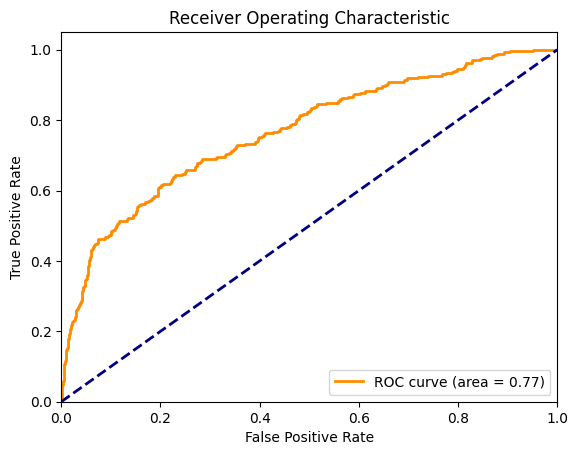

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes.
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area
prob = classifier.predict_proba(X_val)
pred_prob = prob[:,1]

fpr, tpr, thresholds = roc_curve(y_val, pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, pred_prob)

0.7668986481081512

Q. What is the AUC obtained?<br>
Ans - 0.7668986481081512

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data, which is separate from "fitting" or "training" the model.


Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l1'. Make predictions on validation set and compute accuracy, precision and recall.

In [ ]:
### WRITE CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print("Accuracy at C=0.1 ", accuracy)
print("Precision at C=0.1 ", precision)
print("Recall at C=0.1 ", recall)

Accuracy at C=0.1  0.8252508361204013
Precision at C=0.1  0.6804733727810651
Recall at C=0.1  0.42592592592592593


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l1'. Make predictions on validation set and compute accuracy, precision and recall.

In [ ]:
### WRITE CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

model = LogisticRegression(C=0.5, penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print("Accuracy at C=0.5 ", accuracy)
print("Precision at C=0.5 ", precision)
print("Recall at C=0.5 ", recall)

Accuracy at C=0.5  0.8235785953177257
Precision at C=0.5  0.6685714285714286
Recall at C=0.5  0.43333333333333335


Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l2'. Make predictions on validation set and compute accuracy, precision and recall.

In [ ]:
### WRITE CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

model = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print("Accuracy at C=0.1 and l2 penalty ", accuracy)
print("Precision at C=0.1 and l2 penalty ", precision)
print("Recall at C=0.1 and l2 penalty ", recall)

Accuracy at C=0.1 and l2 penalty  0.8210702341137124
Precision at C=0.1 and l2 penalty  0.6627906976744186
Recall at C=0.1 and l2 penalty  0.4222222222222222


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l2'. Make predictions on validation set and compute accuracy, precision and recall. (Try to use a different solver or increase the number of iterations if there is a ConvergenceWarning)

In [ ]:
### WRITE CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

model = LogisticRegression(C=0.5, penalty='l2', solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print("Accuracy at C=0.5 and l2 penalty ", accuracy)
print("Precision at C=0.5 and l2 penalty ", precision)
print("Recall at C=0.5 and l2 penalty ", recall)

Accuracy at C=0.5 and l2 penalty  0.822742474916388
Precision at C=0.5 and l2 penalty  0.6647727272727273
Recall at C=0.5 and l2 penalty  0.43333333333333335


Q. Which of the above models is better?<br>
Ans- As mentioned above, the most fitting model in this case would be the one that optimizes precision due to the importance of FP having a high cost. Therefore, the chosen model should be the first one- C=0.1, and penalty= l1 (the first model).

# Test set

You have worked on training and validation dataset so far, but test data does not include the labels. Choose the best hyperparameter values as seen in previous section and build a model. Use this model to make predictions on test set.

In [ ]:
# Construct your final logistic regression using the best hyperparameters obtained above (C and penalty) ###
from sklearn.linear_model import LogisticRegression

C = 0.1
penalty = 'l1'

precision_model = LogisticRegression(C=C, penalty=penalty, solver='liblinear')
precision_model.fit(X_train, y_train)

y_pred = precision_model.predict(encoded_test)
print(y_pred)

[0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 

# Dataset 2
## Heart Disease Dataset Description

The Heart Disease Dataset contains a number of variables that can be used to predict the presence of heart disease in patients. Each attribute potentially contributes information that could be used to determine heart disease risk.

### Dataset Features:

- **Age**: The patient's age in years.
- **Sex**: The patient's sex (1 = male, 0 = female).
- **Chest Pain Type**: Type of chest pain experienced (values ranging from 1 to 4).
- **Resting Blood Pressure**: Resting blood pressure in mm Hg on admission to the hospital.
- **Serum Cholestrol**: Serum cholesterol in mg/dl.
- **Fasting Blood Sugar**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
- **Resting Electrocardiographic Results**: Resting electrocardiographic results (values 0, 1, 2).
- **Maximum Heart Rate Achieved**: Maximum heart rate achieved during thallium stress test.
- **Exercise Induced Angina**: Exercise-induced angina (1 = yes; 0 = no).
- **ST Depression**: ST depression induced by exercise relative to rest.
- **Slope of the Peak Exercise ST Segment**: The slope of the peak exercise ST segment.
- **Number of Major Vessels**: Number of major vessels colored by fluoroscopy (0-3).
- **Thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect).

### Target Variable:

- **Heart Disease Presence**: The presence of heart disease (0 = no, 1 = yes).




In [ ]:
# Load the data set
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# Convert the target variable to binary
# 0 indicates no disease, 1 indicates any level of disease
y_binary = np.where(y == 0, 0, 1)
y_binary_series = pd.Series(y_binary.reshape(-1), name='HeartDisease')
# Now, X contains the features and y_binary contains the binary target
print(X.head())
print(y_binary_series.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  
0    0
1    1
2    1
3    0
4    0
Name: HeartDisease, dtype: int64


In [ ]:
# Handling missing values (ex- by removing rows with missing data)

# Since 'y' (targets) do not have missing values, they can be used as is
# However, ensure that the rows in 'y' correspond to the rows in the cleaned 'X'

# Check for missing values
print("\nMissing Values:")
print(X.isnull().sum())

# find the index of the missing value
missing_indices = X[(X['ca'].isnull()) | (X['thal'].isnull())].index

X_cleaned = X.drop(missing_indices)
y_cleaned = y_binary_series.drop(missing_indices)

print("\nShapes after cleaning:")
print("X_cleaned:", X_cleaned.shape)
print("y_cleaned:", y_cleaned.shape)

print(X_cleaned.isnull().sum())


Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

Shapes after cleaning:
X_cleaned: (297, 13)
y_cleaned: (297,)
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


Data preprocessing (Standardize the features, one-hot encoding, lable encoding)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [ ]:
# One-hot Encoding

# Categorical columns
categorical_cols = ['cp','slope','restecg','thal']

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(X_cleaned[categorical_cols])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))


# Align the index of the encoded data with X_cleaned
encoded_df.index = X_cleaned.index

X_combined = pd.concat([X_cleaned.drop(categorical_cols, axis=1), encoded_df], axis=1)


print("X_combined:", X_combined.shape)
print("y__cleaned:", y_cleaned.shape)

X_combined: (297, 22)
y__cleaned: (297,)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Standardize fratures


numerical_cols = ['age','trestbps','chol','thalach','oldpeak']

scaler = StandardScaler()
X_combined[numerical_cols] = scaler.fit_transform(X_combined[numerical_cols])

# check
print("Standardized means (should be close to 0):", X_combined[numerical_cols].mean())
print("Standardized standard deviations (should be close to 1):", X_combined[numerical_cols].std())

print("X_combined:", X_combined.shape)
print("y__cleaned:", y_cleaned.shape)


Standardized means (should be close to 0): age        -1.226105e-16
trestbps    4.904420e-16
chol       -1.958777e-16
thalach     4.784800e-16
oldpeak     0.000000e+00
dtype: float64
Standardized standard deviations (should be close to 1): age         1.001688
trestbps    1.001688
chol        1.001688
thalach     1.001688
oldpeak     1.001688
dtype: float64
X_combined: (297, 22)
y__cleaned: (297,)


Splitting training data into training and validation set (the code has been provided)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_combined, y_cleaned, test_size = 0.3, random_state=20)

### Decision Tree
From sklearn.tree use DecisionTreeClassifier to build a classification model with default parameters.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
### Fit the classifier on the training data
# Please set random_state=30
### WRITE CODE HERE ###
dt_classifier = DecisionTreeClassifier(random_state = 30)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=30)

In [ ]:
### Make predictions on the training data

### WRITE CODE HERE ###
y_pred_train = dt_classifier.predict(X_train)
print(y_pred_train)

[0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1
 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0
 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1
 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1
 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0]


Print accuracy, precision and recall for the predictions made on the training data.

In [ ]:
# Print accuracy, precision and recall for the predictions made on the training data.

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_train = accuracy_score(y_train, y_pred_train)

precision_train = precision_score(y_train, y_pred_train)

recall_train = recall_score(y_train, y_pred_train)

print("Accuracy on Training Data:", accuracy_train)
print("Precision on Training Data:", precision_train)
print("Recall on Training Data:", recall_train)

Accuracy on Training Data: 1.0
Precision on Training Data: 1.0
Recall on Training Data: 1.0


In [ ]:
### Make predictions on the validation data
### WRITE CODE HERE ###
y_pred = dt_classifier.predict(X_val)
print(y_pred)


[0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0
 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1]


Print accuracy, prediction and recall for the predictions made on the validation data.

In [ ]:
### WRITE CODE HERE ###
accuracy_train = accuracy_score(y_val, y_pred)

precision_train = precision_score(y_val, y_pred)

recall_train = recall_score(y_val, y_pred)

print("Accuracy on Training Data:", accuracy_train)
print("Precision on Training Data:", precision_train)
print("Recall on Training Data:", recall_train)


Accuracy on Training Data: 0.7
Precision on Training Data: 0.627906976744186
Recall on Training Data: 0.7105263157894737


Plot ROC curve and obtain AUC for predictions on the validation data.

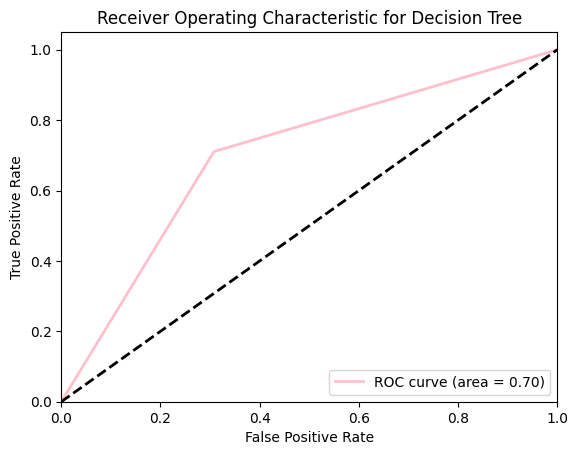

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes.

### WRITE CODE HERE

from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

y_pred_proba = dt_classifier.predict_proba(X_val)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='pink', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.legend(loc="lower right")
plt.show()

Q. Based on the scores for training set and validation set, explain the performance of the above model in terms of bias and variance.<br>

Ans -

*   For bias, it is low in this scenario because the model has a high accuracy on the training data of 1.0. The model's assumptions are quite fitting with the training data.
*   For variance, it is high, as evidenced by the model's perfect scores on the training data but reduced performance on the test data. This indicates that the model is too sensitive to the noise of the training set and is not performing well on the test set, which is indicative of overfitting.



### Random Forest


Decision Trees have low predictive power compared to other methods due to high variance. Random Forest increases prediction power at the expense of decreased interpretability.


From sklearn.ensemble use RandomForestClassifier to build a classification model with default parameters.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
### Fit the classifier on the training data
# Please set random_state=30
### WRITE CODE HERE ###

classifier = RandomForestClassifier(random_state=30)

# Fit the classifier on the training data
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

In [ ]:
### Make predictions on the training data
### WRITE CODE HERE ###
y_pred = classifier.predict(X_train)


Print accuracy, precision and recall for the predictions made on the training data.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Assuming you have made predictions and obtained 'y_pred' for the training data
# Assuming your true target variable for the training data is 'y_cleaned'

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)

# Calculate precision
precision = precision_score(y_train, y_pred)

# Calculate recall
recall = recall_score(y_train, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [ ]:
### Make predictions on the validation data
y_val_pred = classifier.predict(X_val)
### WRITE CODE HERE ###

Print accuracy, prediction and recall for the predictions made on the validation data.

In [ ]:
### WRITE CODE HERE ###
accuracy = accuracy_score(y_val, y_val_pred)

# Calculate precision
precision = precision_score(y_val, y_val_pred)

# Calculate recall
recall = recall_score(y_val, y_val_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.8444444444444444
Precision: 0.8
Recall: 0.8421052631578947


Plot ROC curve and obtain AUC for the validation predictions

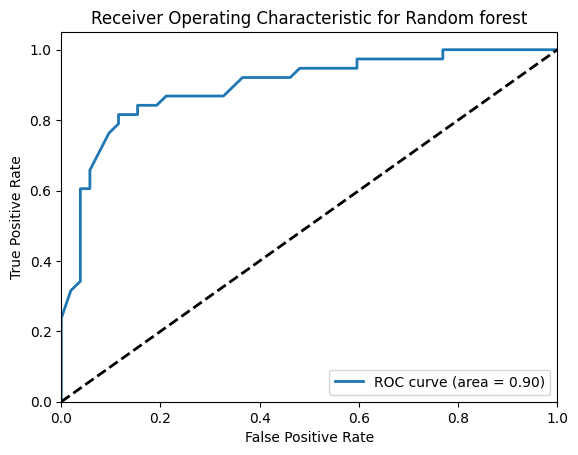

In [ ]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

y_val_pred=classifier.predict_proba(X_val)[:,1]
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred,pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Random forest')
plt.legend(loc="lower right")
plt.show()

Q. Based on the scores for training set and validation set, explain the performance of the above model in terms of bias and variance. Is the Random Forest model better or worse than the Decision Tree model? Explain why you think the performance may have improved or deteriorated.

Ans-
**Decision tree score:**
Accuracy: 0.7
Accuracy: 0.628
Recall: 0.711

**Random forest score:**
Accuracy: 0.844
Accuracy: 0.8
Recall rate: 0.842

**Bias**: Refers to the model being too simple.
**Variance**: Refers to the model being too complex.
A good model needs to strike a balance between the two.

**Decision tree analysis:**
A lower score in the decision tree indicates that it may be too simplistic, resulting in high bias. This means that it cannot effectively capture all patterns in the data.

**Random forest analysis:**
Random Forest shows higher scores in all metrics. This model is potentially better because it combines multiple decision trees, which helps capture more patterns in the data and focus less on specific, potentially misleading data points.

**Random Forest is Better**:
Random forest is more effective because it balances the simplicity of a single tree with the complexity of multiple views. This is similar to getting a more complete and accurate opinion by consulting a group of experts rather than relying on just one.Overall, random forest models performs better than decision trees. It achieves a better balance in understanding the data and avoids the pitfalls of being too simple or too complex.

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data, which is separate from "fitting" or "training" the model.

There are aspects of some models that are user specified. For example, when using a random forest (which is basically an ensemble of decision trees), it is probably a good idea to choose the right number of underlying trees. Too many and the model might overfit, and too few and the model might not be able to properly learn the data. Parameters such as these are referred to as "hyperparameters" or "free parameters", as the values for these are determined by the user and not the algorithm.

A quick and efficient way to optimize hyperparameters is to perform Grid Search over different values of the parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# In the below dictionary, fill in the list of values that you want to try out for each parameter
# Refer to the descriptions in sklearn.ensemble.RandomForestClassifier's doc to understand what the parameters depict

param_grid = {
    'max_depth': [None, 5, 10, 20],
    'max_features': [None, "log2", "sqrt"],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200]
}

In [ ]:
rf = RandomForestClassifier(random_state=30)

In [ ]:
grid_search = GridSearchCV(estimator = rf, scoring='recall', param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
### Fit on the training data with all sets of parameters.
### WRITE CODE HERE ###
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=30), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 'log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='recall', verbose=2)

Display the parameters of the best model.

In [ ]:
# Print the best parameters
### WRITE CODE HERE ###
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Print the best score
print(f'Best score: {grid_search.best_score_}')

Best score: 0.8181818181818182


In [ ]:
### Using the best model, do the following:
### Make predictions on the training set and display accuracy, precision and recall.
### Make predictions on the validation set and display accuracy, precision and recall.

### Using the best model, do the following:
### Make predictions on the training set and display accuracy, precision and recall.
### WRITE CODE HERE ###

best_model = RandomForestClassifier(random_state=30, max_depth = None, max_features = 'log2', min_samples_leaf = 1, min_samples_split =
                                    2, n_estimators = 200)
best_model.fit(X_train, y_train)

y_train_pred_best = best_model.predict(X_train)

#Print accuracy score for training set
accuracy_train_best = my_accuracy(y_train, y_train_pred_best)

precision_train_best = my_precision(y_train, y_train_pred_best)

recall_train_best = my_recall(y_train, y_train_pred_best)

print("Accuracy on Training Data:", accuracy_train_best)
print("Precision on Training Data:", precision_train_best)
print("Recall on Training Data:", recall_train_best)


### Make predictions on the validation set and display accuracy, precision and recall.
### WRITE CODE HERE ###
y_val_pred_best = best_model.predict(X_val)

#Print accuracy score for validation set
accuracy_val_best = my_accuracy(y_val, y_val_pred_best)

precision_val_best = my_precision(y_val, y_val_pred_best)

recall_val_best = my_recall(y_val, y_val_pred_best)

print("Accuracy on Validation Data:", accuracy_val_best)
print("Precision on Validation Data:", precision_val_best)
print("Recall on Validation Data:", recall_val_best)

Accuracy on Training Data: 1.0
Precision on Training Data: 1.0
Recall on Training Data: 1.0
Accuracy on Validation Data: 0.8555555555555555
Precision on Validation Data: 0.8048780487804879
Recall on Validation Data: 0.868421052631579


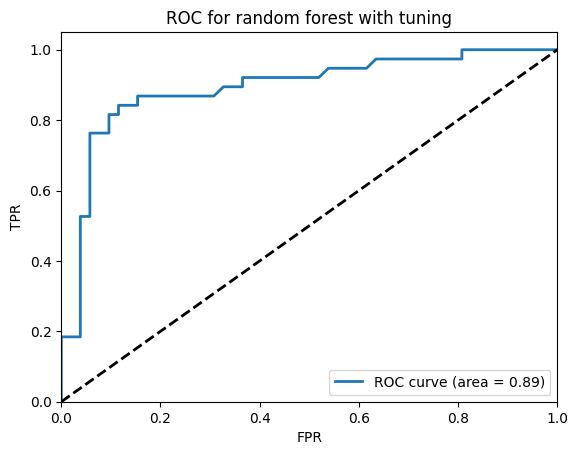

In [ ]:
# Plot the ROC curve on validation set by giving appropriate names for title and axes.

### WRITE CODE HERE
# Compute ROC curve and area
fpr, tpr, thresholds = roc_curve(y_val, best_model.predict_proba(X_val)[:, 1])
roc_auc_1 = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc_1)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC for random forest with tuning')
plt.legend(loc="lower right")
plt.show()


### Individual student contribution

Student 1 Joy Lin - Dataset 1 Setup + Standardization and One-hot Encoding + Logistic Regression  </br>
Student 2 Alex Beltchev - Dataset 1 Hyperparameters + Test set </br>
Student 3 Lilian Chan - Dataset 2 Setup + Decision Tree </br>
Student 4 Xinyu Zhang - Dataset 2 Random Forest </br>
Student 5 Eric Jin - Dataset 2 Hyperparameters